# Predicting the Adoptability of Shelter Animals: A Classification Analysis

### Group 2
### Members: 
- 

In [37]:
library(readr)
library(tidyverse)
library(ggplot2) 

## Summary

## Introduction

Animal shelters provide a valuable service for both homeless animals and prospective pet owners, but more and more they are failing the animals due to being over capacity and having a lack of resources. The Shelter Animals Count Database describes the root of the problem as "more animals are entering shelters than are leaving them" (1). Due to this, many animals must be gotten rid of before they even have a chance to be adopted. According to the Rescue Paws Foundation over 4000 animals are euthanised in US shelters per day (2). This is an animal treatment crisis, as shelters struggle to find animals new homes. While many people are interested in adopting from shelters, they aren't doing it at high enough rates compared to animal abandonment. For the sake of the animals and shelters' continued success in their mission, It is important to figure out how best to address this issue.

A report from Hill's Pet Nutrition says that one of the biggest obstacles in the way of pet adoption is guardians' unrealistic expectations (3). By examining the data on what prospective adtopers look for in a pet, we can assess how shelters can address these issues. While certain qualities might be more desirable, shelters can focus their efforts on aiding those animals that might otherwise be overlooke. ASPCA suggests streamlinging adoption processes, better matchmaking, and enhanced marketing are all valuable ways to increase aadoption in shelters (4). All of these can be aided by analysis of adoption data. By figuring out what characteristics in animals are most relevant to adoption, shelters can focus their marketing efforts and resources into helping the animals that need it most. In our project, we will attempt to predict whether an animal will be adopted or not based on different descriptive factors of the animal, so that shelters are better equipped to find homes for as many animals as possible.

## Methods and Results

*Written explanation:* 

In [23]:
animals <- read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/refs/heads/main/data/2025/2025-03-04/longbeach.csv", show_col_types = FALSE) 
head(animals)

animal_id,animal_name,animal_type,primary_color,secondary_color,sex,dob,intake_date,intake_condition,intake_type,⋯,outcome_date,crossing,jurisdiction,outcome_type,outcome_subtype,latitude,longitude,outcome_is_dead,was_outcome_alive,geopoint
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<date>,<date>,<chr>,<chr>,⋯,<date>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<lgl>,<lgl>,<chr>
A693708,*charlien,dog,white,NA,Female,2013-02-21,2023-02-20,ill mild,stray,⋯,2023-02-26,"[2600 BLK LONG BEACH BLVD, LONG BEACH CA, 90806",Long Beach,euthanasia,ill severe,33.80479,-118.1889,TRUE,FALSE,"33.8047935, -118.1889261"
A708149,NA,reptile,brown,green,Unknown,NA,2023-10-03,normal,stray,⋯,2023-10-03,"`600 BLK E HARCOURT, LB 90805",Long Beach,rescue,other resc,33.86800,-118.2009,FALSE,TRUE,"33.8679994, -118.2009307"
A638068,NA,bird,green,red,Unknown,NA,2020-01-01,injured severe,wildlife,⋯,2020-01-01,"0 BLK GRAND AVE, LONG BEACH, CA 90803",Long Beach,euthanasia,inj severe,33.76048,-118.1481,TRUE,FALSE,"33.7604783, -118.1480912"
A639310,NA,bird,white,gray,Unknown,NA,2020-02-02,ill severe,wildlife,⋯,2020-02-02,"0 BLK TEMPLE AVE, LONG BEACH, CA 90803",Long Beach,transfer,lbah,33.76246,-118.1597,FALSE,TRUE,"33.7624598, -118.1596777"
A618968,*morgan,cat,black,white,Female,2014-12-18,2018-12-18,injured severe,stray,⋯,2019-01-13,"0 BLK W ZANE ST, LONG BEACH, CA 90805",Long Beach,rescue,littlelion,33.84950,-118.1949,FALSE,TRUE,"33.8495009, -118.1949053"
A730385,*brandon,rabbit,black,white,Neutered,2023-04-19,2024-10-18,normal,stray,⋯,2024-11-15,00 AQUARIUM WAY LONG BEACH CA 90802,Long Beach,adoption,web,33.76399,-118.1944,FALSE,TRUE,"33.7639859, -118.1944096"


In [42]:
#cleaning the data: 
animals <- animals %>% 
    select(animal_type, primary_color, sex, dob, intake_condition, intake_type, outcome_type) %>% 
    #filter(animal_type != "other") %>%
    na.omit()

animals$outcome_group <- recode(animals$outcome_type,
  "adoption" = "Adopted",
  "foster" = "Adopted",
  "foster to adopt" = "Adopted",
  "homefirst" = "Adopted",
  "rescue" = "Adopted",
  .default = "Not Adopted"  # Everything else is considered "Not Adopted"
)

head(animals)

animal_type,primary_color,sex,dob,intake_condition,intake_type,outcome_type,outcome_group
<chr>,<chr>,<chr>,<date>,<chr>,<chr>,<chr>,<chr>
dog,white,Female,2013-02-21,ill mild,stray,euthanasia,Not Adopted
cat,black,Female,2014-12-18,injured severe,stray,rescue,Adopted
rabbit,black,Neutered,2023-04-19,normal,stray,adoption,Adopted
cat,black,Unknown,2017-08-21,under age/weight,stray,rescue,Adopted
dog,cream,Spayed,2007-12-15,aged,owner surrender,rescue,Adopted
cat,gray tabby,Female,2015-01-11,normal,stray,transfer,Not Adopted


In [45]:
#summary of the data: 
summary(animals)
table(animals$outcome_group)
table(animals$outcome_type)
table(animals$intake_condition)

 animal_type        primary_color          sex                 dob            
 Length:25256       Length:25256       Length:25256       Min.   :1993-05-28  
 Class :character   Class :character   Class :character   1st Qu.:2016-06-03  
 Mode  :character   Mode  :character   Mode  :character   Median :2018-09-23  
                                                          Mean   :2018-07-12  
                                                          3rd Qu.:2021-12-28  
                                                          Max.   :2031-03-30  
 intake_condition   intake_type        outcome_type       outcome_group     
 Length:25256       Length:25256       Length:25256       Length:25256      
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                              


    Adopted Not Adopted 
      12213       13043 


               adoption           community cat                    died 
                   6149                     334                     553 
               disposal               duplicate              euthanasia 
                     35                      26                    3780 
                 foster         foster to adopt               homefirst 
                      7                     164                      86 
                missing                  rescue         return to owner 
                     53                    5807                    3107 
       return to rescue  return to wild habitat shelter, neuter, return 
                     46                      95                     896 
               transfer               transport   trap, neuter, release 
                   3956                     127                      35 


              aged     behavior  mild behavior  moderate   behavior  severe 
               153                 68                124                 68 
             feral          fractious         i/i report           ill mild 
               278                633                220               1030 
    ill moderatete         ill severe      injured  mild  injured  moderate 
               741                894                687                748 
   injured  severe         intakeexam             normal   under age/weight 
              1226                  1              12639               5686 
  welfare seizures 
                60 

### Exploratory Analysis Visualizations 

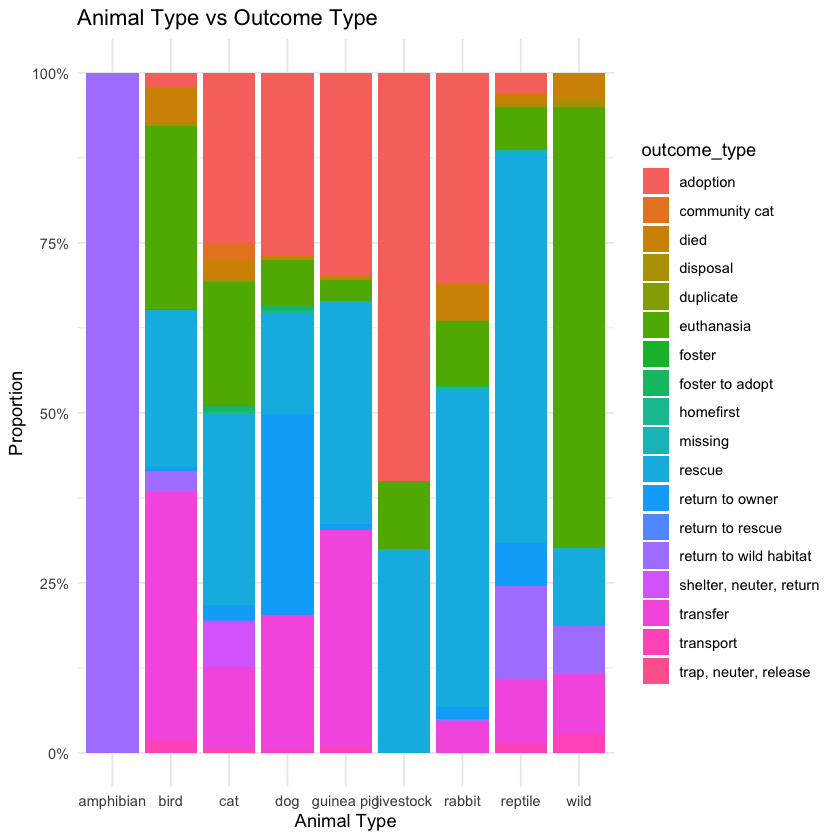

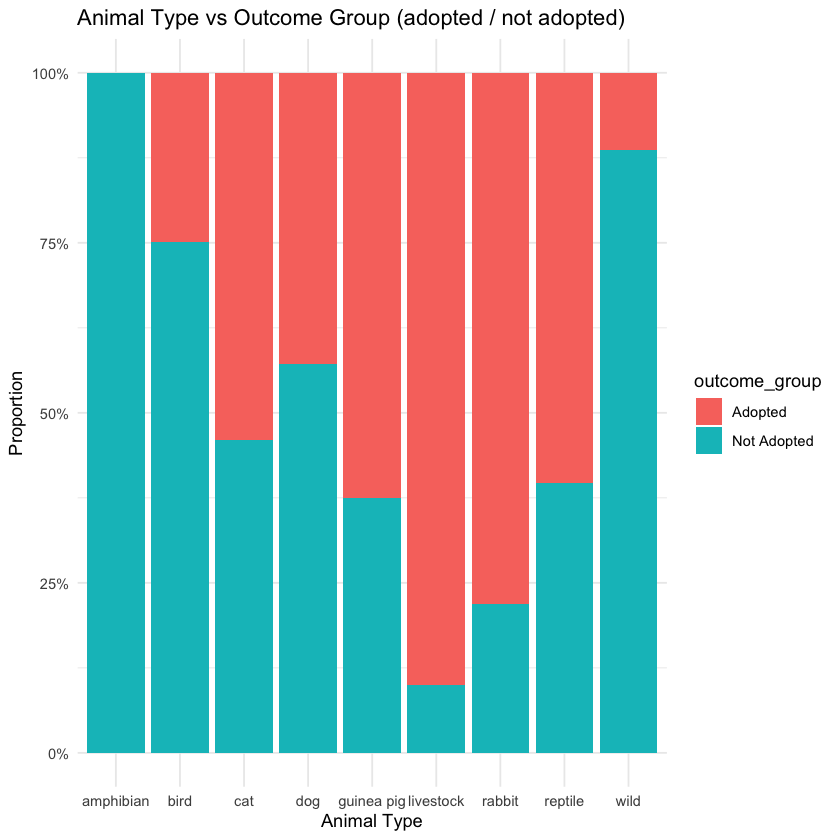

In [55]:
ggplot(animals, aes(x = animal_type, fill = outcome_type)) +
  geom_bar(position = "fill") +  
  labs(title = "Animal Type vs Outcome Type",
       x = "Animal Type",
       y = "Proportion") +
  theme_minimal() +
  scale_y_continuous(labels = scales::percent)

ggplot(animals, aes(x = animal_type, fill = outcome_group)) +
  geom_bar(position = "fill") + 
  labs(title = "Animal Type vs Outcome Group (adopted / not adopted)",
       x = "Animal Type",
       y = "Proportion") +
  theme_minimal() +
  scale_y_continuous(labels = scales::percent)

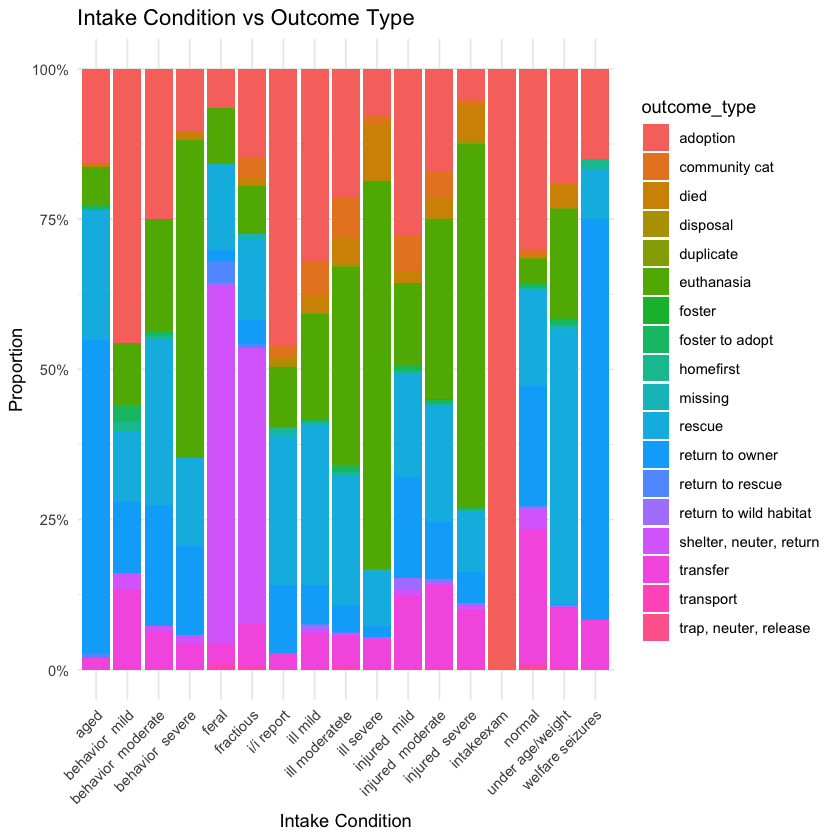

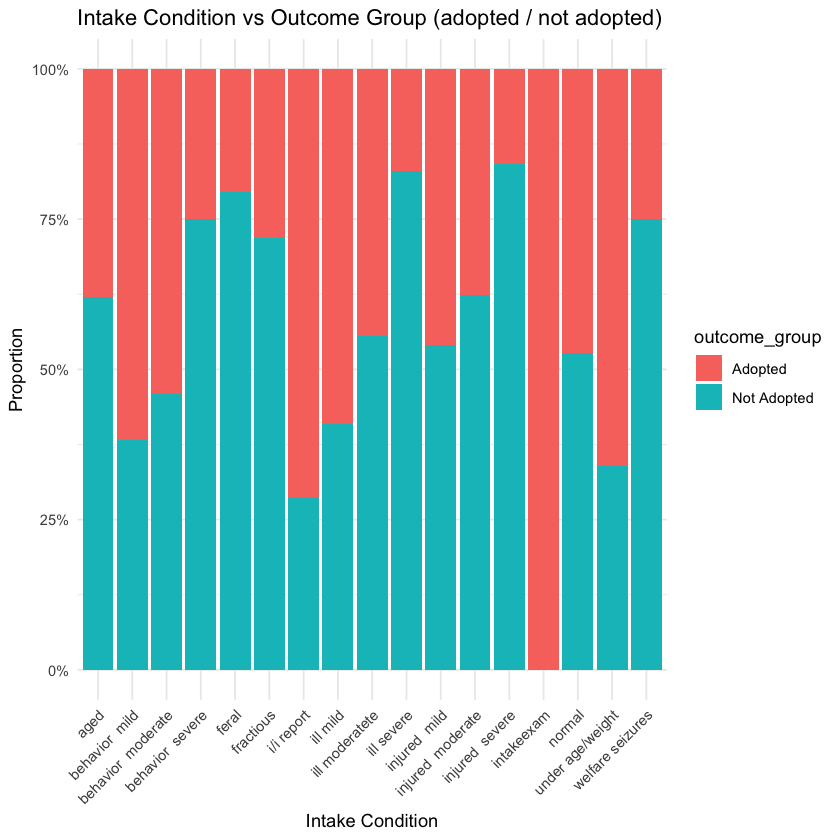

In [75]:
ggplot(animals, aes(x = intake_condition, fill = outcome_type)) +
  geom_bar(position = "fill") + 
  labs(title = "Intake Condition vs Outcome Type",
       x = "Intake Condition",
       y = "Proportion") +
  theme_minimal() +
  scale_y_continuous(labels = scales::percent) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

ggplot(animals, aes(x = intake_condition, fill = outcome_group)) +
  geom_bar(position = "fill") +
  labs(title = "Intake Condition vs Outcome Group (adopted / not adopted)",
       x = "Intake Condition",
       y = "Proportion") +
  theme_minimal() +
  scale_y_continuous(labels = scales::percent) +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

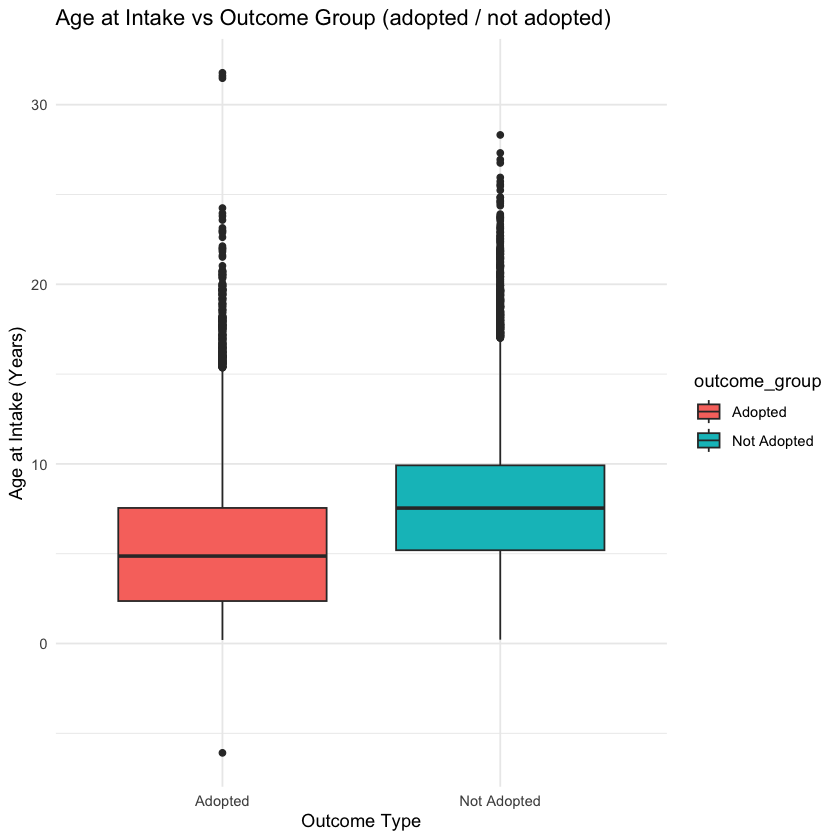

In [63]:
animals$age_at_intake <- as.numeric(difftime(Sys.Date(), animals$dob, units = "days")) / 365

# Boxplot of age at intake vs outcome_type
ggplot(animals, aes(x = outcome_group, y = age_at_intake, fill = outcome_group)) +
  geom_boxplot() +
  labs(title = "Age at Intake vs Outcome Group (adopted / not adopted)",
       x = "Outcome Type",
       y = "Age at Intake (Years)") +
  theme_minimal()

### Classification Analysis 

In [67]:
animals$outcome_binary <- ifelse(animals$outcome_group == "Adopted", 1, 0)

table(animals$outcome_binary)


    0     1 
13043 12213 

## Discussion

## References

1. Sac. “Pet Euthanasia Rates Are at a 3-Year High, but Experts Say There Are Ways to Help besides Adoption.” Shelter Animals Count, 17 Sept. 2023, www.shelteranimalscount.org/pet-euthanasia-rates-are-at-a-3-year-high-but-experts-say-there-are-ways-to-help-besides-adoption/. 
2. “Saving Companion Animals from Inhumane Conditons.” Our Cause for Paws - Ourcauseforpaws.Org, www.ourcauseforpaws.org/blogs/news/saving-companion-animals-from-inhumane-conditons?gad_source=1&gclid=Cj0KCQiA2oW-BhC2ARIsADSIAWq1F3Lnd2Skw3YVgVHO5VoI_1YCFx22YWl-eJ9mrUaJ4HX_dxgdrOYaAu1YEALw_wcB. Accessed 28 Feb. 2025. 
3. 2023 State of Shelter Adoption Report, Hill’s Pet Nutrition, theaawa.org/wp-content/uploads/2023/11/hills-pet-nutrition-2023-state-of-shelter-adoption-report.pdf. 
4. “Effective Tips to Boost Adoptions: Reduce Barriers & Improve Experience.” ASPCApro, 11 Sept. 2024, www.aspcapro.org/resource/effective-tips-boost-adoptions-reduce-barriers-improve-experience. 